# **Decision Trees**

The Wisconsin Breast Cancer Dataset(WBCD) can be found here(https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)

This dataset describes the characteristics of the cell nuclei of various patients with and without breast cancer. The task is to classify a decision tree to predict if a patient has a benign or a malignant tumour based on these features.

Attribute Information:
```
#  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
```


1. a) Implement a decision tree(from scratch using only python data structures) as a class.

In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import math

headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv('breast-cancer-wisconsin.data', na_values='?', header=None, index_col=['ID'], names = headers) 
data = data.reset_index(drop=True)
data = data.fillna(0)
#data.describe()

y = np.array(data.iloc[:,9])
df=data.drop("Diagnosis",1)

X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.2,random_state=42)

X_train=np.array(X_train)
X_test=np.array(X_test)

In [142]:
import math
class Decision_Tree_Classifier:

  def __init__(self,max_depth,nf, m):
    self.mode=m
    self.max_depth=max_depth
    self.nf=nf

  def DFS1(self,tree,tab_space):
    
    if tree.left is None and tree.right is None :
      return tab_space+str(tree.pd)

    #st=tab_space+"Is " + headers[tree.feature_index] + "?\n"
    
    left_side=tree.left
    right_side=tree.right
    if right_side:
      st= tab_space+"Is " + headers[tree.feature_index] + "?\n" +tab_space + "False Branch\n"
      new_tab = tab_space + ' '
      st= st + self.DFS1(right_side,new_tab)
    
    if left_side:
      st = tab_space+"Is " + headers[tree.feature_index] + "?\n" + tab_space + "True Branch\n"
      new_tab = tab_space + ' '
      st = st + self.DFS1(left_side,new_tab)
    #print(type(st))
    #print(st)
    return st

  def DFS(self):
    tab_space=''
    st=self.DFS1(self.Tree,tab_space)
    print(st)


  def expand_tree(self,x,y,depth):
    total_count=[(y==2).sum(),(y==4).sum()]
    pd = -1
    
    if(total_count[0] < total_count[1]):
      pd=4
    else:
      pd=2
    #print(pd)
    # print("&&&&&&&&&&&&&&&")
    # print(total_count[0],total_count[1])
    # print()

    if(self.mode=="gini"):
      gini=self.gini_val(total_count[0],total_count[1])
    
    if(self.mode=="entropy"):
      entropy=self.entropy_val(total_count[0],total_count[1])
    
    node = Node(pd,len(y),total_count)
    
    if((self.mode=="gini" and gini==0) or (self.mode=="entropy" and entropy==0)):
      return node
    
    if depth < self.max_depth:

      if(self.mode=="gini" or self.mode=="entropy"):
        best_index,best_gini,best_th=self.best_split(x,y,self.nf)

      if best_index!=-1:
        right_index = x[:, best_index] > best_th
        left_index = x[:, best_index] <= best_th
        x_right = x[right_index]
        y_right = y[right_index]
        x_left = x[left_index]
        y_left = y[left_index]

        node.feature_index = best_index
        node.threshold = best_th
        
        node.left=self.expand_tree(x_left, y_left, depth + 1)
        node.right=self.expand_tree(x_right, y_right, depth + 1)
    return node

  def predict(self,x_test):
    ans=[]
    for i in x_test:
      Tree_node = self.Tree
      
      while Tree_node:
        if i[Tree_node.feature_index] > Tree_node.threshold:
          
          if Tree_node.right!=None: 
            Tree_node=Tree_node.right
          else:
            ans.append(Tree_node.pd)
            break
        
        else:
          
          if Tree_node.left is not None:
            Tree_node = Tree_node.left
          else:
            ans.append(Tree_node.pd)
            break
          
    return ans
  
  def gini_val(self,a,b):
    if(a+b==0):
      return 0
    else:
      return 1-(a**2 + b**2) / ((a+b)**2)

  def entropy_val(self,a,b):
    if(a+b ==0 or a==0 or b==0):
      return 0
    else:
      return -(a/(a+b))*math.log2(a/(a+b))-(b/(a+b))*math.log2(b/(a+b))

  def fit_model(self,x, y):
    self.n_classes_ = 2  
    self.Tree=self.expand_tree(x,y,0)



  def best_split(self,x,y,nf):
    best_index , best_gini, best_entropy , best_th=-1, 1, 1, -1
    
    for i in range(nf):
      li=[]
      a=0
      b=0
      for j in range(len(y)):
        li.append([x[j,i],y[j]])
        if(y[j]==2):
          a=a+1
        else:
          b=b+1
        
      li.sort(key=lambda x:x[0])
      k=0
    
      right_cnt=[a,b]
      left_cnt=[0,0]
    
      while(k<len(y)):
        temp=li[k][0]
        
        while (k<len(y) and li[k][0]==temp):
          if(li[k][1]==2):
            right_cnt[0] = right_cnt[0] - 1
            left_cnt[0] = left_cnt[0] + 1
          
          if(li[k][1]==4):
            right_cnt[1] = right_cnt[1]- 1
            left_cnt[1] =1 + left_cnt[1]
          k+=1

        if(self.mode=="gini"):
          cur_gini_right=self.gini_val(right_cnt[0],right_cnt[1])
          cur_gini_left = self.gini_val(left_cnt[0],left_cnt[1])
          sum1=0
          sum2=0
          for abc in left_cnt:
            sum1+=abc
          for abc in right_cnt:
            sum2+=abc
            
          
          fin_gini=(sum1*cur_gini_left + sum2*cur_gini_right) / (sum1+sum2)
          
          if(fin_gini < best_gini):
            best_gini=fin_gini
            best_index=i
            best_th=temp

        if(self.mode=="entropy"):
          # print("$$$$$$$$$$$$$$$$$")
          # print(leftcnt[0])
          # print(leftcnt[1])
          # print(rightcnt[0])
          # print(rightcnt[1])

          cur_entro_left=self.entropy_val(left_cnt[0],left_cnt[1])
          cur_entro_right=self.entropy_val(right_cnt[0],right_cnt[1])
          
          sum1=0
          sum2=0
          for abc in left_cnt:
            sum1+=abc
          for abc in right_cnt:
            sum2+=abc
          
          fin_entro=(sum1*cur_entro_left + sum2*cur_entro_right)/(sum1+sum2)
 
          if(fin_entro<best_entropy):
            best_entropy=fin_entro
            best_index=i
            best_th=temp
 
    if(self.mode=="gini"):
      return best_index,best_gini,best_th      
    elif(self.mode=="entropy"):
      return best_index,best_entropy,best_th



In [143]:
class Node:
  def __init__(self,pd, num_samples,totalcnt):
    self.pd=pd
    self.num_samples = num_samples
    self.totalcnt=totalcnt
    self.feature_index=0
    self.threshold=0
    self.left=None
    self.right=None


1. b) Train a decision tree object of the above class on the WBC dataset using misclassification rate, entropy and Gini as the splitting metrics.

In [144]:
obj=Decision_Tree_Classifier(5,9,"gini")
obj.fit_model(X_train,y_train)
y_pred=obj.predict(X_test)
# print("$$$$$$$$$$$$$$$$$")

num_correct1= np.sum(y_pred == y_test)
accuracy1= float(num_correct1) / len(X_test)

# print("$$$$$$$$$$$$$$$$$")

obj=Decision_Tree_Classifier(5,9,"entropy")
obj.fit_model(X_train,y_train)
y_pred=obj.predict(X_test)

# print("$$$$$$$$$$$$$$$$$")

num_correct2= np.sum(y_pred == y_test)
accuracy2= float(num_correct2) / len(X_test)

# print("$$$$$$$$$$$$$$$$$")

1. c) Report the accuracies in each of the above splitting metrics and give the best result. 

In [145]:
print('Got %d / %d correct => accuracy: %f for gini index' % (num_correct1, len(X_test), accuracy1))
print('Got %d / %d correct => accuracy: %f for entropy' % (num_correct2, len(X_test), accuracy2))

Got 134 / 140 correct => accuracy: 0.957143 for gini index
Got 133 / 140 correct => accuracy: 0.950000 for entropy


1. d) Experiment with different approaches to decide when to terminate the tree(number of layers, purity measure, etc). Report and give explanations for all approaches. 

In class "Decision_Tree_Classifier": def "expand_tree": a condition for pruning the decision tree is used,
        which does not allow the decision tree to split further when a pure class is obtained
        that is entropy=0 or gini index=0.

1. e) Does standardisation and normalisation help in this case? Report

Answer:Here, the CART algorithm does not involve any type of equations. Hence, standardization and normalization are of no help.

2. Compare your trained model with a model trained by the scikit-learn DecisionTreeClassifier module. Compare accuracies.

In [146]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
Y_Pred=clf.predict(X_test)
#print(Y_Pred)
print("Accuracy using scikit-learn is:",accuracy_score(Y_Pred,y_test))



Accuracy using scikit-learn is: 0.9428571428571428


3. Output a depth first traversal of your decision tree in a file named ```outputimp.txt``` respectively in the following format and submit it along with the assignment.


```
<Node classification criteria in words.>
<Branch label>
  ... And so on, recursively.
```
 
For example,
a depth first search traversal for the below decision tree would be:

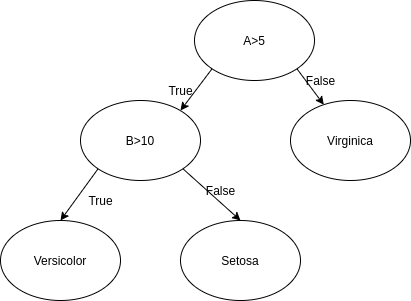
```
Is A>5?
True Branch
  Is B>10?
  True Branch
    Versicolor
  Is B>10?
  False Branch
    Setosa
Is A>5?
False Branch
	Virginica

```




In [147]:
ob=Decision_Tree_Classifier(5,9,"gini")
ob.fit_model(X_train,y_train)
wr=str(ob.DFS())


## added in a text file
f=open("outputimp.txt","w")
f.write(wr)
f.close()


Is UCSize?
True Branch
 Is SECSize?
 True Branch
  Is BC?
  True Branch
   Is MA?
   True Branch
    Is SECSize?
    True Branch
     2


4. Experiment with removing features that are redundant, highly correlated with other features and report accuracies of the resulting model. Explain your approach.

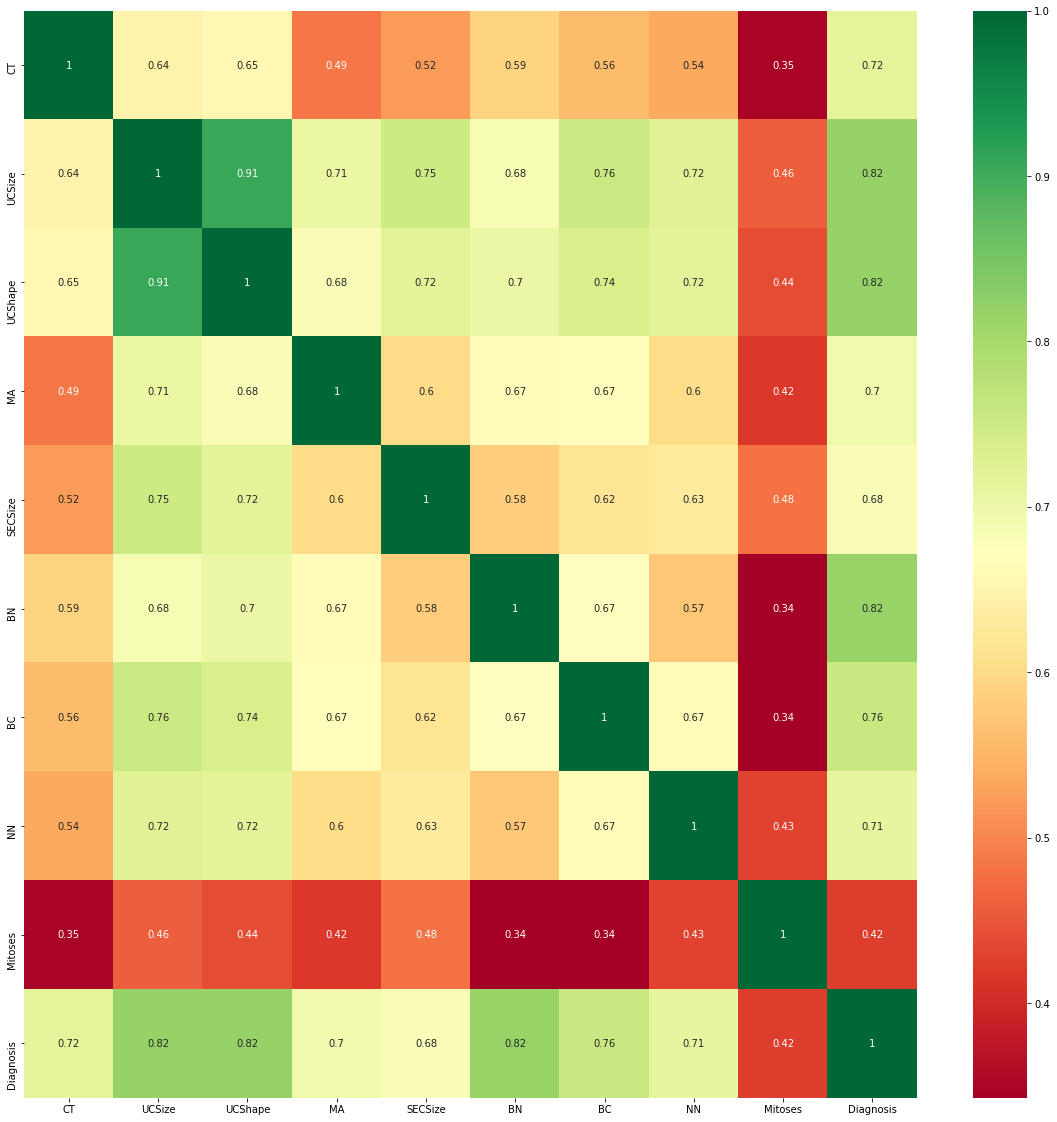

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

cmt=data.corr()
top_corr_features = cmt.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [149]:
#Now removing ucshape as ucshape and ucsize are highly co-related (0.91).

#data=data.drop("UCShape",1)
y=data.iloc[:,8]
y=np.array(y)
print(data)

X=data.drop("Diagnosis",1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
x_train=np.array(x_train)
x_test=np.array(x_test)

     CT  UCSize  UCShape  MA  SECSize    BN  BC  NN  Mitoses  Diagnosis
0     5       1        1   1        2   1.0   3   1        1          2
1     5       4        4   5        7  10.0   3   2        1          2
2     3       1        1   1        2   2.0   3   1        1          2
3     6       8        8   1        3   4.0   3   7        1          2
4     4       1        1   3        2   1.0   3   1        1          2
..   ..     ...      ...  ..      ...   ...  ..  ..      ...        ...
694   3       1        1   1        3   2.0   1   1        1          2
695   2       1        1   1        2   1.0   1   1        1          2
696   5      10       10   3        7   3.0   8  10        2          4
697   4       8        6   4        3   4.0  10   6        1          4
698   4       8        8   5        4   5.0  10   4        1          4

[699 rows x 10 columns]


In [150]:
obj=Decision_Tree_Classifier(3,8,"gini")
obj.fit_model(X_train,y_train)
y_pred=obj.predict(X_test)
accuracy_score(y_pred,y_test)

0.07142857142857142

5. Report the advantages and disadvantages of decision trees based on the above question.

Answer:

Advantages:
1. Does not require normalization of data.
2. Does not require scaling of data as well.
3. Missing values in the data also do NOT affect the process of building a decision tree to any considerable extent.
4. Compared to other algorithms decision trees requires less effort for data preparation during pre-processing.
5. A Decision tree model is very intuitive and easy to explain to technical teams as well as stakeholders.

Disadvantage:
1. A small change in the data can cause a large change in the structure of the decision tree causing instability.
2. Often involves higher time to train the model.
3. Training is relatively expensive as the complexity and time has taken are more.
4. Inadequate for applying regression and predicting continuous values.